In [35]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import scipy.stats as st

### Extract CSVs into DataFrames

In [36]:
gdp_file = "../Resources/GDP.csv"
gdp_df = pd.read_csv(gdp_file)
gdp_df.head()

,ID,DATE,GDP
0,1,1/1/48,6.2
1,2,4/1/48,6.8
2,3,7/1/48,2.3
3,4,10/1/48,0.4
4,5,1/1/49,-5.4


In [37]:
unrate_file = "../Resources/UNRATE.csv"
unrate_df = pd.read_csv(unrate_file)
unrate_df.head()

,ID,DATE,RATE
0,1,1/1/48,3.4
1,2,4/1/48,3.9
2,3,7/1/48,3.6
3,4,10/1/48,3.7
4,5,1/1/49,4.3


### Transform premise DataFrame

In [38]:
# Create a filtered dataframe from specific columns
gdp_cols = ["ID", "DATE", "GDP"]
gdp_transformed= gdp_df[gdp_cols].copy()

# Rename the column headers
gdp_transformed = gdp_transformed.rename(columns={"ID": "id",
                                                  "DATE": "Date",
                                                  "GDP": "GDP"})

# Clean the data by dropping duplicates and setting the index
gdp_transformed.drop_duplicates("id", inplace=True)
gdp_transformed.set_index("id", inplace=True)

gdp_transformed.head()

,Date,GDP
id,,
1,1/1/48,6.2
2,4/1/48,6.8
3,7/1/48,2.3
4,10/1/48,0.4
5,1/1/49,-5.4


### Transform county DataFrame

In [39]:
unrate_cols = ["ID", "DATE", "RATE"]
unrate_transformed = unrate_df[unrate_cols].copy()

# Rename the column headers
unrate_transformed = unrate_transformed.rename(columns={"ID": "id",
                                                      "DATE": "Date",
                                                      "RATE": "Unemployment Rate"})

# Set index
unrate_transformed.set_index("id", inplace=True)

unrate_transformed.head()

,Date,Unemployment Rate
id,,
1,1/1/48,3.4
2,4/1/48,3.9
3,7/1/48,3.6
4,10/1/48,3.7
5,1/1/49,4.3


### Create database connection

In [40]:
connection_string = "postgres:cloud12s@localhost:5432/customer_db"
engine = create_engine(f'postgresql://{connection_string}')

In [41]:
# Confirm tables
engine.table_names()

['premise', 'county', 'GDP', 'Unemployment']

### Load DataFrames into database

In [42]:
gdp_transformed.to_sql(name='GDP', con=engine, if_exists='append', index=True)

In [43]:
unrate_transformed.to_sql(name='Unemployment', con=engine, if_exists='append', index=True)

The correlation between both factors is -0.04


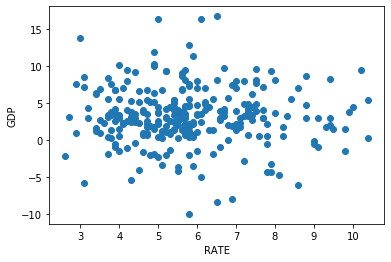

In [44]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(unrate_transformed["Unemployment Rate"].astype(float),gdp_transformed["GDP"].astype(float))
plt.xlabel('RATE')
plt.ylabel('GDP')
correlation = st.pearsonr(unrate_transformed["Unemployment Rate"].astype(float),gdp_transformed["GDP"].astype(float))
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()